![image info](https://raw.githubusercontent.com/albahnsen/MIAD_ML_and_NLP/main/images/banner_1.png)

# Taller: Construcción e implementación de árboles de decisión y métodos de ensamblaje

En este taller podrá poner en práctica los sus conocimientos sobre construcción e implementación de árboles de decisión y métodos de ensamblajes. El taller está constituido por 9 puntos, 5 relacionados con árboles de decisión (parte A) y 4 con métodos de ensamblaje (parte B).

## Parte A - Árboles de decisión

En esta parte del taller se usará el conjunto de datos de Capital Bikeshare de Kaggle, donde cada observación representa el alquiler de una bicicleta durante una hora y día determinado. Para más detalles puede visitar los siguientes enlaces: [datos](https://github.com/justmarkham/DAT8/blob/master/data/bikeshare.csv), [dicccionario de datos](https://www.kaggle.com/c/bike-sharing-demand/data).

### Datos prestamo de bicicletas

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Importación de librerías
import pandas as pd
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor, export_graphviz, plot_tree
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
# Lectura de la información de archivo .csv
bikes = pd.read_csv('https://raw.githubusercontent.com/albahnsen/MIAD_ML_and_NLP/main/datasets/bikeshare.csv', index_col='datetime', parse_dates=True)
# Renombrar variable "count" a "total"
bikes.rename(columns={'count':'total'}, inplace=True)
# Crear la hora como una variable 
bikes['hour'] = bikes.index.hour
# Visualización
bikes.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,total,hour
datetime,,,,,,,,,,,,
2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,0
2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,1
2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2
2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,3
2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,4


### Punto 1 - Análisis descriptivo

Ejecute las celdas 1.1 y 1.2. A partir de los resultados realice un análisis descriptivo sobre las variables hour y workingday, escriba sus inferencias sobre los datos. Para complementar su análisis puede usar métricas como máximo, mínimo, percentiles entre otros.

In [5]:
# Celda 1.1
bikes.groupby('workingday').total.mean()

workingday
0    188.506621
1    193.011873
Name: total, dtype: float64

In [6]:
bikes.groupby('workingday').total.describe()

,count,mean,std,min,25%,50%,75%,max
workingday,,,,,,,,
0,3474.0,188.506621,173.724015,1.0,44.0,128.0,304.0,783.0
1,7412.0,193.011873,184.513659,1.0,41.0,151.0,277.0,977.0


- En los días laborales el número promedio de alquileres es mayor a los fines de semana o festivos.

In [7]:
# Celda 1.2
bikes.groupby('hour').total.mean()

hour
0      55.138462
1      33.859031
2      22.899554
3      11.757506
4       6.407240
5      19.767699
6      76.259341
7     213.116484
8     362.769231
9     221.780220
10    175.092308
11    210.674725
12    256.508772
13    257.787281
14    243.442982
15    254.298246
16    316.372807
17    468.765351
18    430.859649
19    315.278509
20    228.517544
21    173.370614
22    133.576754
23     89.508772
Name: total, dtype: float64

In [8]:
bikes.groupby('hour').total.describe()

,count,mean,std,min,25%,50%,75%,max
hour,,,,,,,,
0,455.0,55.138462,43.620012,2.0,24.00,41.0,74.50,283.0
1,454.0,33.859031,34.112105,1.0,11.00,19.0,46.00,168.0
2,448.0,22.899554,26.110267,1.0,5.00,11.0,32.00,119.0
3,433.0,11.757506,12.666442,1.0,3.00,6.0,15.00,66.0
4,442.0,6.407240,4.217633,1.0,3.00,6.0,9.00,28.0
5,452.0,19.767699,12.784293,1.0,8.00,19.0,29.00,57.0
6,455.0,76.259341,54.745333,1.0,24.50,75.0,118.00,213.0
7,455.0,213.116484,159.207044,1.0,63.00,208.0,334.00,596.0
8,455.0,362.769231,231.723065,8.0,133.50,392.0,563.50,839.0


- Las hora que presenta una mayor cantidad de alquileres son las 5:00 pm y 6 p.m. Las horas con la menor cantidad de alquileres son 3am - 4am. 
- Las horas que presentan mayor variabilidad son a las 8.am y a las 5pm-6pm. Se podría pensar que esto se debe a que estas franjas horarias son necesariamente más activas en días laborales que en fines de semana o feriados.

### Punto 2 - Análisis de gráficos

Primero ejecute la celda 2.1 y asegúrese de comprender el código y el resultado. Luego, en cada una de celdas 2.2 y 2.3 escriba un código que genere una gráfica de las rentas promedio por hora cuando la variable "workingday" es igual a 0 e igual a 1, respectivamente. Analice y escriba sus hallazgos.

<AxesSubplot:xlabel='hour'>

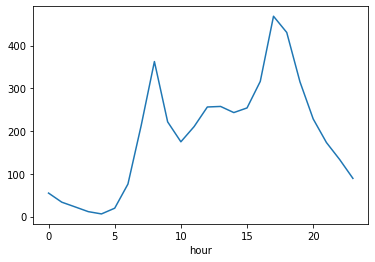

In [9]:
# Celda 2.1 - rentas promedio para cada valor de la variable "hour"
bikes.groupby('hour').total.mean().plot()

<AxesSubplot:xlabel='hour'>

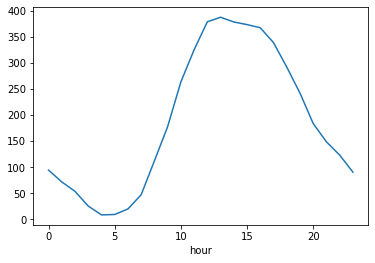

In [10]:
# Celda 2.2 - "workingday"=0 escriba su código y hallazgos 

bikes.loc[bikes['workingday']==0].groupby('hour').total.mean().plot()


<AxesSubplot:xlabel='hour'>

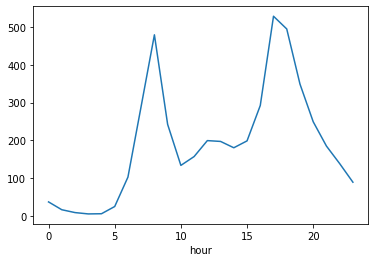

In [11]:
# Celda 2.3 - "workingday"=1 escriba su código y hallazgos 
bikes.loc[bikes['workingday']==1].groupby('hour').total.mean().plot()

- De las gráficas anteriores se evidencia que durante semana la cantidad de alquileres tiene un pico en la franja de la mañana (cuando las personas se dirigen a sus lugares de trabajo/estudio) y otro pico en la tarde (cuando las personas regresan a sus hogares).
- Por el contrario los fines de semana el uso de bicilcetas va incrementando mas lentamente en las horas de la mañana y se mantiene en valores altos durante la tarde y finalmente empieza a disminuir más rápidamente después de las 4pm.
- El comportamiento agregado tiene un comportamiento más parecido al de los días laborales ya que su frecuencia es mayor. 

### Punto 3 - Regresión lineal
En la celda 3 ajuste un modelo de regresión lineal a todo el conjunto de datos, utilizando "total" como variable de respuesta y "hour" y "workingday" como las únicas variables predictoras. Luego, imprima los coeficientes e interprételos. ¿Cuáles son las limitaciones de la regresión lineal en este caso?

In [12]:
# Celda 3
RegLin = LinearRegression()

X = bikes.loc[:,['hour','workingday']]
Y = bikes.loc[:,'total']

RegLin.fit(X,Y)

RegLin.coef_



array([10.49206282,  4.07248627])

- Aplicando una regresión lineal obtenemos que la cantidad de bicicletas alquiladas crece en 10.49 unidades por cada hora, y adicionalmente si es día laboral este valor aumenta en 4.07 unidades (con respecto a los fines de semana / feriados).
- En este caso la regresión lineal no captura el comportamiento no lineal de las variables.

### Punto 4 - Árbol de decisión manual
En la celda 4 cree un árbol de decisiones para pronosticar la variable "total" iterando **manualmente** sobre las variables "hour" y  "workingday". El árbol debe tener al menos 6 nodos finales.

In [13]:
# Celda 4
max_depth = 2
num_pct = 10
max_features = None
min_gain=0.1


In [14]:
#La métrica que se aplicará es el MSE ya que las variable a predecir es continua.

def MSE(Y):

    if Y.shape[0] == 0:
        return 0
    else:
        return np.square(Y-Y.mean()).mean()

In [15]:
#Se define la ganacia o mejora del MSE para evaluar si una partición genera algún beneficio.

def MSE_gain(Xi, y, split):

    filter_l = Xi < split
    y_l = y.loc[filter_l]
    y_r = y.loc[~filter_l]

    n_l = y_l.shape[0]
    n_r = y_r.shape[0]

    MSE_y = MSE(y)
    MSE_l = MSE(y_l)
    MSE_r = MSE(y_r)

    MSE_gain = MSE_y - (n_l / (n_l + n_r) * MSE_l + n_r / (n_l + n_r) * MSE_r)

    return MSE_gain

In [16]:
#Se evaluarán particiones para cada hora en la variable 'hour'.

j = 0
print(X.columns[j])
splits = np.unique(X.iloc[:,j].tolist())
splits

hour


array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23])

In [17]:
#Teniendo en cuenta que 'workingday' es una dummy, únicamente se divide entre los 0 y 1.

j = 1
print(X.columns[j])
splits = np.unique(X.iloc[:,j].tolist())
splits

workingday


array([0, 1])

In [18]:
# Definición de la función best_split para calcular cuál es la mejor variable y punto de cortepara hacer la bifurcación del árbol
def best_split(X, y, num_pct=10):
    
    features = range(X.shape[1])
    
    best_split = [0, 0, 0]  # j, split, gain
    
    # Para todas las varibles 
    for j in features:
        
        splits = np.unique(X.iloc[:,j].tolist())
     
        splits = np.unique(splits)[1:]
        
        # Para cada partición
        for split in splits:
            gain = MSE_gain(X.iloc[:, j], y, split)
                        
            if gain > best_split[2]:
                best_split = [j, split, gain]
    
    return best_split

In [19]:
# Definición de la función tree_grow para hacer un crecimiento recursivo del árbol
def tree_grow(X, y, level=0, min_gain=0.001, max_depth=None, num_pct=10):
    
    # Si solo es una observación
    if X.shape[0] == 1:
        tree = dict(y_pred=y.iloc[:1].values[0], level=level, split=-1, n_samples=1, gain=0)
        return tree
    
    # Calcular la mejor división
    j, split, gain = best_split(X, y, num_pct)
    
    # Guardar el árbol y estimar la predicción
    y_pred = y.mean() 

    tree = dict(y_pred=y_pred, level=level, split=-1, n_samples=X.shape[0], gain=gain, column=j)
    # Revisar el criterio de parada 
    if gain < min_gain:
        return tree
    if max_depth is not None:
        if level >= max_depth:
            return tree   
    
    # Continuar creando la partición
    filter_l = X.iloc[:, j] < split
    X_l, y_l = X.loc[filter_l], y.loc[filter_l]
    X_r, y_r = X.loc[~filter_l], y.loc[~filter_l]
    tree['split'] = [j, split]

    # Siguiente iteración para cada partición
    
    tree['sl'] = tree_grow(X_l, y_l, level + 1, min_gain=min_gain, max_depth=max_depth, num_pct=num_pct)
    tree['sr'] = tree_grow(X_r, y_r, level + 1, min_gain=min_gain, max_depth=max_depth, num_pct=num_pct)
    
    return tree

In [20]:
tree_grow(X, Y, level=0, min_gain=0.001, max_depth=3, num_pct=10)


{'y_pred': 191.57413191254824,
 'level': 0,
 'split': [0, 7],
 'n_samples': 10886,
 'gain': 10242.567809384564,
 'column': 0,
 'sl': {'y_pred': 32.58203249442498,
  'level': 1,
  'split': [0, 6],
  'n_samples': 3139,
  'gain': 323.4004463794806,
  'column': 0,
  'sl': {'y_pred': 25.177719821162444,
   'level': 2,
   'split': [0, 2],
   'n_samples': 2684,
   'gain': 191.40441543022723,
   'column': 0,
   'sl': {'y_pred': 44.51045104510451,
    'level': 3,
    'split': -1,
    'n_samples': 909,
    'gain': 701.2852140818165,
    'column': 1},
   'sr': {'y_pred': 15.27718309859155,
    'level': 3,
    'split': -1,
    'n_samples': 1775,
    'gain': 38.68122558781732,
    'column': 1}},
  'sr': {'y_pred': 76.25934065934067,
   'level': 2,
   'split': [1, 1],
   'n_samples': 455,
   'gain': 1480.8192588203635,
   'column': 1,
   'sl': {'y_pred': 19.99310344827586,
    'level': 3,
    'split': -1,
    'n_samples': 145,
    'gain': 0,
    'column': 0},
   'sr': {'y_pred': 102.57741935483871,


### Punto 5 - Árbol de decisión con librería
En la celda 5 entrene un árbol de decisiones con la **librería sklearn**, usando las variables predictoras "hour" y "workingday" y calibre los parámetros que considere conveniente para obtener un mejor desempeño. Comente el desempeño del modelo con alguna métrica de desempeño de modelos de clasificación y compare desempeño con el modelo del punto 3.

In [21]:
# Celda 5
DTReg = DecisionTreeRegressor()

DTReg.fit(X,Y)

DecisionTreeRegressor()

- Se estimará el modelo con diferentes valores para el parámetro max_depth para calibrar su valor.

In [22]:
cv_scores = list()

for i in range(1,21):
    DTReg = DecisionTreeRegressor(max_depth = i)
    DTReg.fit(X,Y)
    cv_scores.append(np.mean(cross_val_score(DTReg, X, Y)))



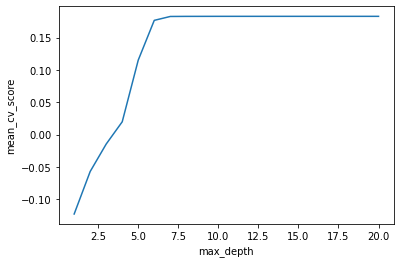

9

In [23]:
plt.plot(range(1,21),cv_scores)
plt.xlabel('max_depth')
plt.ylabel('mean_cv_score')
plt.show()

DTReg.tree_.max_depth

- Sin embargo se encuentra que en todo caso el max_depth es de 9 (aunque se permita tener una profundidad mayor). Con esta profundidad se alcanza el CV_Score máximo por lo que no se modificará.

- A continuación se muestran los 3 primero niveles del árbol estimado.

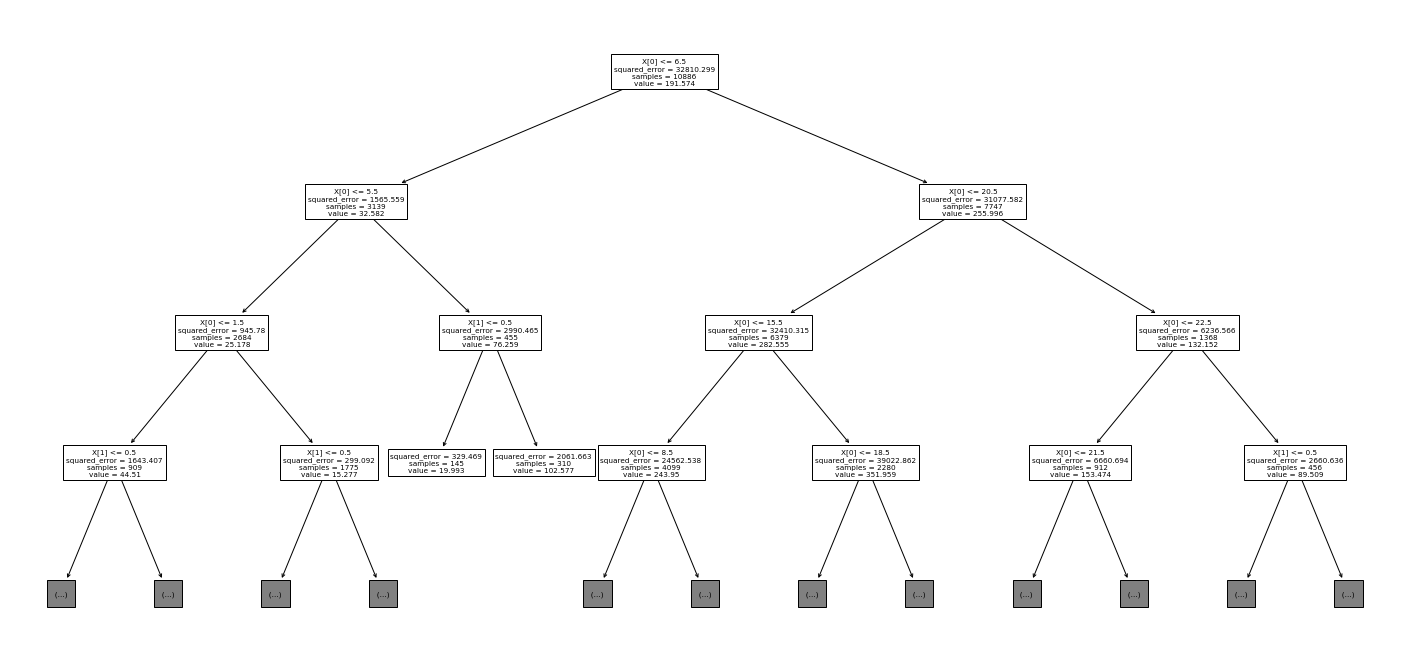

In [24]:
plt.figure(figsize=(25,12))
plot_tree(DTReg, max_depth = 3)
plt.show()


- A continuación se muestra la comparación con el modelo del punto 3 (Regresión Lineal)
- Se compara el score de cada modelo (R2) uilizando el cross validation (por default es 5-fold cross validation).
- A excepción del primer fold, el árbol de decisión presenta un desempeño significativamente mayor al modelo de regresión lineal, por lo que el score promedio del árbol de decisión es mayor.

In [25]:
scoreRL = cross_val_score(RegLin, X, Y)
scoreDT = cross_val_score(DTReg, X, Y)

print("Scores regresión lineal", scoreRL,"\nScores árboles de decisión", scoreDT)

print("Scores promedio regresión lineal", np.mean(scoreRL))
print("Scores promedio árboles de decisión", np.mean(scoreDT))


Scores regresión lineal [-1.48052554  0.24816294 -0.0884747   0.01692438  0.01975082] 
Scores árboles de decisión [-1.62712549  0.85130313  0.51089531  0.58116819  0.59842956]
Scores promedio regresión lineal -0.25683242140857965
Scores promedio árboles de decisión 0.18293414231097282


## Parte B - Métodos de ensamblajes
En esta parte del taller se usará el conjunto de datos de Popularidad de Noticias Online. El objetivo es predecir la cantidad de reacciones en redes sociales (popularidad) de la notica. Para más detalles puede visitar el sigueinte enlace: [datos](https://archive.ics.uci.edu/ml/datasets/online+news+popularity).

### Datos popularidad de noticias

In [26]:
# Lectura de la información de archivo .csv
df = pd.read_csv('https://raw.githubusercontent.com/albahnsen/MIAD_ML_and_NLP/main/datasets/mashable.csv', index_col=0)
df.head()

,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,Popular
0,http://mashable.com/2014/12/10/cia-torture-rep...,28.0,9.0,188.0,0.732620,1.0,0.844262,5.0,1.0,1.0,...,0.200000,0.80,-0.487500,-0.60,-0.250000,0.9,0.8,0.4,0.8,1
1,http://mashable.com/2013/10/18/bitlock-kicksta...,447.0,7.0,297.0,0.653199,1.0,0.815789,9.0,4.0,1.0,...,0.160000,0.50,-0.135340,-0.40,-0.050000,0.1,-0.1,0.4,0.1,0
2,http://mashable.com/2013/07/24/google-glass-po...,533.0,11.0,181.0,0.660377,1.0,0.775701,4.0,3.0,1.0,...,0.136364,1.00,0.000000,0.00,0.000000,0.3,1.0,0.2,1.0,0
3,http://mashable.com/2013/11/21/these-are-the-m...,413.0,12.0,781.0,0.497409,1.0,0.677350,10.0,3.0,1.0,...,0.100000,1.00,-0.195701,-0.40,-0.071429,0.0,0.0,0.5,0.0,0
4,http://mashable.com/2014/02/11/parking-ticket-...,331.0,8.0,177.0,0.685714,1.0,0.830357,3.0,2.0,1.0,...,0.100000,0.55,-0.175000,-0.25,-0.100000,0.0,0.0,0.5,0.0,0


In [27]:
# Definición variable de interes y variables predictoras
X = df.drop(['url', 'Popular'], axis=1)
y = df['Popular']
y.mean()

0.5

In [28]:
# División de la muestra en set de entrenamiento y prueba
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

### Punto 6 - Árbol de decisión y regresión logística
En la celda 6 construya un árbol de decisión y una regresión logística. Para el árbol calibre al menos un parámetro y evalúe el desempeño de cada modelo usando las métricas de Accuracy y F1-Score.

In [29]:
#Modelo de Regresión Logística

from sklearn.linear_model import LogisticRegression
from sklearn import metrics

clfLogit = LogisticRegression()
clfLogit.fit(X_train , y_train)

predict_logit = clfLogit.predict(X_test)


print(metrics.f1_score(predict_logit, y_test))
print(metrics.accuracy_score(predict_logit, y_test))


0.6110363391655451
0.6146666666666667


In [30]:
#Modelo de Decision Tree Classifier SIN CALIBRAR

from sklearn.tree import DecisionTreeClassifier

clfDT = DecisionTreeClassifier()
clfDT.fit(X_train , y_train)

predict_DT = clfDT.predict(X_test)


print(metrics.f1_score(predict_DT, y_test))
print(metrics.accuracy_score(predict_DT, y_test))



0.544127405441274
0.542


In [35]:
#Calibración del arbol sobre el parametro MIN_SAMPLES_SPLIT


F1 = list()
accuracy = list()
ROC_AUC = list()

for i in range(2,800):

    clfDT = DecisionTreeClassifier(min_samples_split= i)
    clfDT.fit(X_train , y_train)
    predict_DT = clfDT.predict(X_test)
    predict_DT_prob=clfDT.predict_proba(X_test)[:,1]
    F1.append(metrics.f1_score(predict_DT, y_test))
    accuracy.append(metrics.accuracy_score(predict_DT, y_test))
    ROC_AUC.append(metrics.roc_auc_score(y_test, predict_DT_prob))


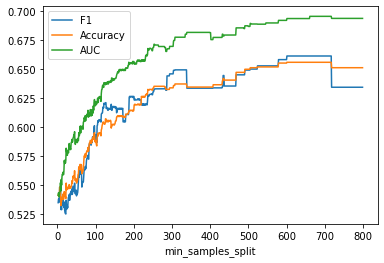

In [43]:
Xdomain=range(2,800)
plt.plot(Xdomain,F1, label='F1')
plt.plot(Xdomain,accuracy, label='Accuracy')
plt.plot(Xdomain,ROC_AUC, label='AUC')
plt.xlabel('min_samples_split')
plt.legend()
plt.show()

- Se encuentra que los mayores valores de accuracy, F1-Score y AUC se dan alrededor de un una tamaño de muestra mínimo en cada split de alrededor de un poco mas de 600 observaciones y menor a 700 observaciones.
- A continuación se estima el modelo con un parámetro de 650.

In [44]:
from sklearn.tree import DecisionTreeClassifier

clfDT = DecisionTreeClassifier(min_samples_split=650)
clfDT.fit(X_train , y_train)

predict_DT = clfDT.predict(X_test)


print(metrics.f1_score(predict_DT, y_test))
print(metrics.accuracy_score(predict_DT, y_test))

0.6614173228346457
0.656


- Como se puede observar las métricas del modelo después de calibrado tiene un mejor desempeño.

### Punto 7 - Votación Mayoritaria
En la celda 7 elabore un esamble con la metodología de **Votación mayoritaria** compuesto por 300 muestras bagged para cada uno de los siguientes escenarios:

-100 árboles de decisión donde max_depth = None\
-100 árboles de decisión donde max_depth = 2\
-100 regresiones logísticas

Evalúe los modelos utilizando las métricas de Accuracy y F1-Score.

In [45]:
#Decision Tree con MaxDepth = None
from sklearn.ensemble import BaggingClassifier

clfDT_default = BaggingClassifier(base_estimator=DecisionTreeClassifier(max_depth=None), n_estimators=100, max_samples=300, bootstrap=True,
                        random_state=42, n_jobs=-1, oob_score=True)

clfDT_default.fit(X_train , y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(), max_samples=300,
                  n_estimators=100, n_jobs=-1, oob_score=True, random_state=42)

In [46]:
#Decision Tree con MaxDepth = 2
from sklearn.ensemble import BaggingClassifier

clfDT_depth2 = BaggingClassifier(base_estimator=DecisionTreeClassifier(max_depth=2), n_estimators=100, max_samples=300, bootstrap=True,
                        random_state=42, n_jobs=-1, oob_score=True)

clfDT_depth2.fit(X_train , y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(max_depth=2),
                  max_samples=300, n_estimators=100, n_jobs=-1, oob_score=True,
                  random_state=42)

In [47]:
#Logistic Regression
from sklearn.ensemble import BaggingClassifier

clfLR = BaggingClassifier(base_estimator=LogisticRegression(), n_estimators=100, max_samples=300, bootstrap=True,
                        random_state=42, n_jobs=-1, oob_score=True)

clfLR.fit(X_train , y_train)

BaggingClassifier(base_estimator=LogisticRegression(), max_samples=300,
                  n_estimators=100, n_jobs=-1, oob_score=True, random_state=42)

In [49]:
#Comparación de resultados
models = [clfDT_default, clfDT_depth2, clfLR]
F1_comparison = list()
accuracy_comparison = list()

for model in models:

    predicted = model.predict(X_test)
    F1_comparison.append(metrics.f1_score(predicted, y_test))
    accuracy_comparison.append(metrics.accuracy_score(predicted, y_test))

print('\t  Decision Tree\t\tDec Tree Depth = 2  Logistic Regression')
print('Accuracy:', accuracy_comparison)
print('F1:\t ', F1_comparison)



	  Decision Tree		Dec Tree Depth = 2  Logistic Regression
Accuracy: [0.6613333333333333, 0.6453333333333333, 0.6186666666666667]
F1:	  [0.6567567567567568, 0.631578947368421, 0.6129905277401894]


- Se ecuentra que el modelo donde no se restringe la profundidad del árbol obtiene el mejor desempeño a cuando se limita la profundidad del árbol a 2.
- El modelo de regresión logística es el que tiene un desempeño un poco menor.

### Punto 8 - Votación Ponderada
En la celda 8 elabore un ensamble con la metodología de **Votación ponderada** compuesto por 300 muestras bagged para los mismos tres escenarios del punto 7. Evalúe los modelos utilizando las métricas de Accuracy y F1-Score

In [50]:
# Celda 8

# Obtención de los pesos alpha de cada modelo estimado en el punto 7 . La ponderación se realiza de acuerdo al 1 - proporcion del error OOB.

F1_weighted = list()
accuracy_weighted = list()


for model in models:

    errors = np.zeros(model.n_estimators)
    y_pred_all_ = np.zeros((X_test.shape[0], model.n_estimators))

    for i in range(model.n_estimators):
        oob_sample = ~model.estimators_samples_[i]
        y_pred_ = model.estimators_[i].predict(X_train.values[oob_sample])
        errors[i] = metrics.accuracy_score(y_pred_, y_train.values[oob_sample])
        y_pred_all_[:, i] = model.estimators_[i].predict(X_test)
    
    alpha = (1 - errors) / (1 - errors).sum()
    y_pred = (np.sum(y_pred_all_ * alpha, axis=1) >= 0.5).astype(int)
    
    F1_weighted.append(metrics.f1_score(y_pred, y_test))
    accuracy_weighted.append(metrics.accuracy_score(y_pred, y_test))




In [51]:
print('Comparación Modelos Votacion Ponderada')
print('\t  Decision Tree\t\tDec Tree Depth = 2  Logistic Regression')
print('Accuracy:', accuracy_weighted)
print('F1:\t ', F1_weighted)



Comparación Modelos Votacion Ponderada
	  Decision Tree		Dec Tree Depth = 2  Logistic Regression
Accuracy: [0.6633333333333333, 0.6466666666666666, 0.62]
F1:	  [0.6631087391594397, 0.6324549237170597, 0.6159029649595688]


### Punto 9 - Comparación y análisis de resultados
En la celda 9 comente sobre los resultados obtenidos con las metodologías usadas en los puntos 7 y 8, compare los resultados y enuncie posibles ventajas o desventajas de cada una de ellas.

- De acuerdo a los resultados obtenidos, los modelos con votación ponderada tienen un desempeño ligeramente mejor que los modelos con votación mayoritaria. En ambos casos la regresión logística es el que tiene un peor desempeño.
- En ambos casos se obtuvo que limitar la profundidad del árbol a una profundidad de 2 reduce el desempeño. En general, cuando se agregan modelos es preferible tener una mayor profundidad, ya que aunque esto aumenta la varianza al cambiar las muestras, la varianza se ve reducida una vez se hace el proceso de agregación.
- Los modelos de votación con ponderación, dan un mayor peso a los modelos que tienen un menor error Out-Of-Bag. En este caso esto mejoró ligeramente el desempeño de los modelos aunque lo hace un poco más dificil de implementar y de interpretar, ya que cada iteración en la que se estima cada modelo tiene un peso diferente.
